# Проверка гипотез. Задача 2


In [1]:
import numpy as np
import scipy.stats as sts
from matplotlib import pyplot as plt
%matplotlib inline

#### 1. Пусть $X_1, \dots, X_n$ - выборка из распределения $N(\theta, 1)$. Построим функцию мощности критерия Стьюдента проверки гипотезы $H_0: \theta = 0$ уровня значимости $0.05$ для $\theta \in [-10, 10]$ для разных $n$.

Критерий имеет вид: 
$$
S = \left\{\sqrt{n-1}\left|\frac{\overline{X}}{s} \right| > t_{0.975}\right\},
$$ где $s = \sqrt{\overline{X^2} - (\overline X)^2}$, а $t_{0.975}$ - квантиль распределения Стьюдента $T_{n-1}$. В качесте оценки функции мощности $\beta(\theta, S) = P_\theta(X\in S)$ сгенерируем $N$ выборок из нормального распределения с параметром $\theta$ и возьмем среднее по бернуллиевской выборке принадлежностей выборок к критическому множеству.

In [2]:
def get_prob(N, n, theta, theta0, t):
    samples = sts.norm(theta, 1).rvs((N, n))
    return np.sum([(np.sqrt(n - 1) * np.abs((np.mean(X) - theta0) / 
                np.sqrt(np.mean(X ** 2) - np.mean(X) ** 2)) > t)
                         for X in samples]) / N

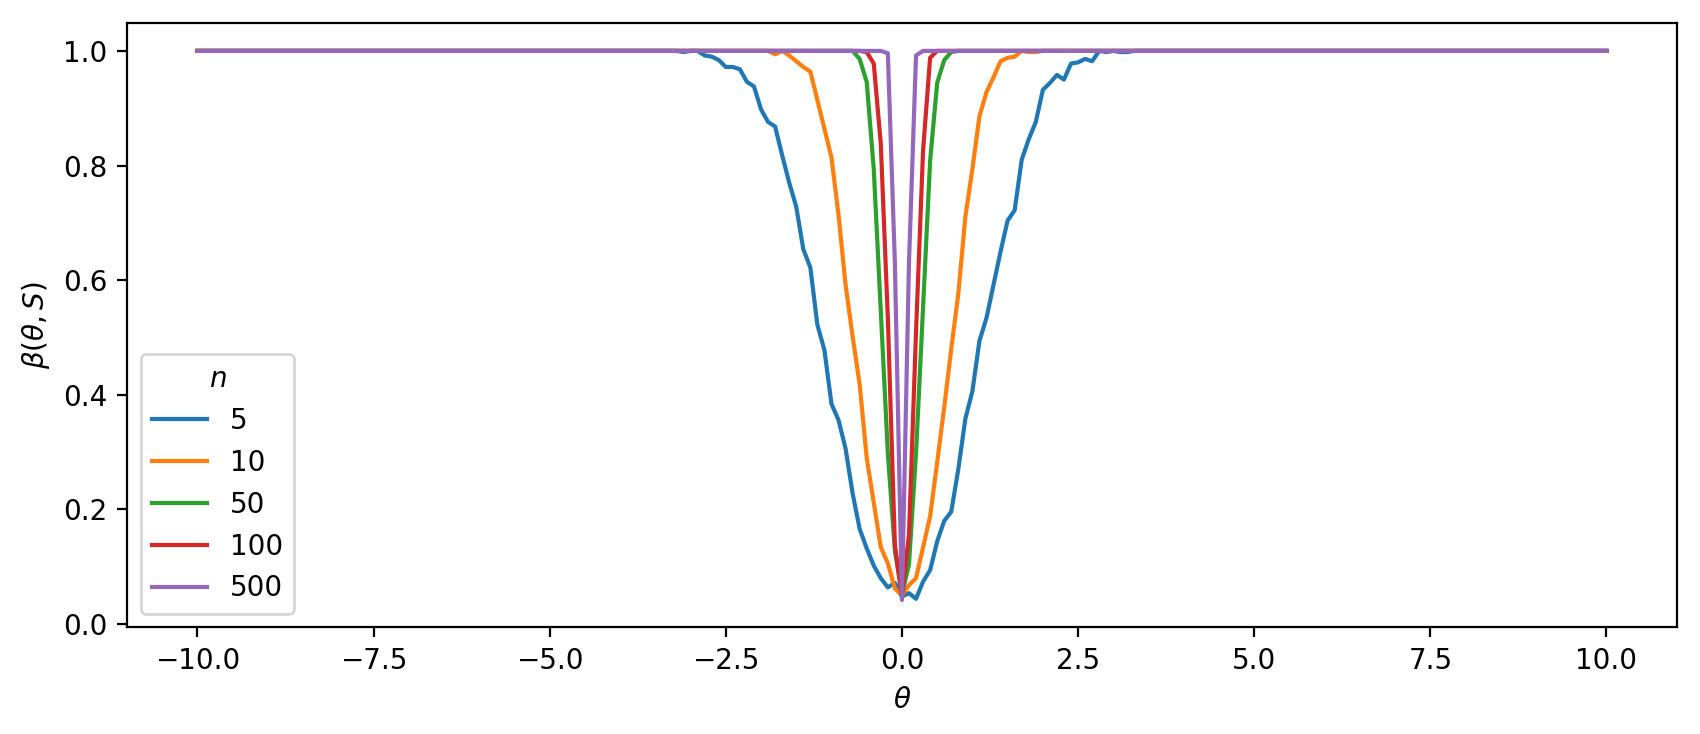

In [3]:
alpha  = 0.05
N = 500
ns = [5, 10, 50, 100, 500]
thetas = np.linspace(-10, 10, 201)
plt.figure(figsize=(10, 4), dpi=200)
for n in ns:
    t = sts.t.ppf(1 - alpha / 2, n - 1)
    betas = []
    for theta in thetas:
        betas.append(get_prob(N, n, theta, 0, t))
    plt.plot(thetas, betas, label=str(n))
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\beta(\theta, S)$')
plt.legend(title=r'$n$')
plt.show()


Видим, что при увеличении $n$ функция мощности стремится к 1 для всех $\theta \ne 0$. Это означает, что критерий является состоятельным. Действительно, имеем $\overline X \overset{P_\theta}{\rightarrow} \theta \ne 0, s \overset{P_\theta}{\rightarrow} 1$, а значит,  $\sqrt{n-1}\left|\frac{\overline{X}}{s} \right| \overset{P_\theta}{\rightarrow}\infty$, то есть $P_\theta(X \in S) \rightarrow 1, \,\, n \rightarrow \infty$.

#### 2. Найдем такое минимальное $n$, что при $|\theta_0 - \theta_1| = 1 $ при проверке гипотезы $H_0: \theta = \theta_0$  против $H_1: \theta = \theta_1$ критерием Стьюдента уровня значимости 0.05 вероятность ошибки второго рода станет меньше вероятности ошибки первого рода. 

Вероятность ошибки первого рода равна $P_{\theta_0}(X \in S)$, а второго рода - $P_{\theta_1}(X \notin S) = 1 - P_{\theta_1}(X \in S)$. Найдем требуемое $n$ для разных $\theta$ из сетки.

In [4]:
ns_min = []
for theta0 in thetas:
    diff = -1
    theta1 = theta0 + diff
    n = 5
    perr1 = 0
    perr2 = 1
    while perr1 <= perr2:
        n += 1
        t = sts.t.ppf(1 - alpha / 2, n - 1)
        perr1 = get_prob(N, n, theta0, theta0, t)
        perr2 = 1 - get_prob(N, n, theta1, theta0, t)
      
    ns_min.append(n)
    # чередуем знак разности параметров  
    diff *= diff
        

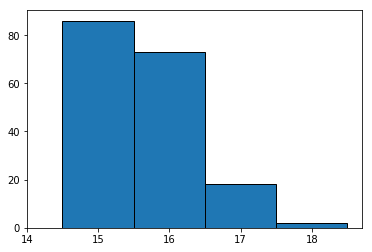

In [22]:
unique = np.array(list(set(ns_min)))
plt.hist(ns_min, bins=unique + 0.5, ec='k') 
plt.xticks(unique)
plt.show()

Видим, что  значения для разных $\theta$ получаются около $n = 16$, что не очень много. В качестве оценки можем взять максимальное число из полученного массива:

In [21]:
n_min = np.max(ns_min)
n_min

18

#### 3. Вывод

Мы показали экспериментально состоятельность критерия Стьюдента. Вторая часть задачи показывает, что для   $|\theta_0 - \theta_1| = 1 $ состоятельность достигается довольно быстро, то есть уже при небольших $n$ вероятность ошибки второго рода близка к нулю.